In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [0]:
from urllib.request import urlretrieve
iris = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv'
urlretrieve(iris)
Iris= pd.read_csv(iris, sep=',')

Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
Iris.shape


(150, 5)

In [0]:
Iris = Iris[:-50] 
Iris.shape

(100, 5)

In [0]:
Iris["species"].replace({"setosa": 0, "versicolor": 1}, inplace=True)
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


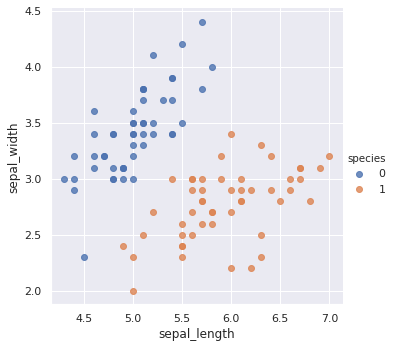

In [0]:
sns.set(style='whitegrid')
sns.set(color_codes=True)
sns.lmplot(x="sepal_length",y="sepal_width", data=Iris, hue="species", fit_reg=False)

In [0]:
X = Iris.drop('species', axis=1).values #feature matrix
Y = Iris.species.values #output



In [0]:
seed = 5      #setting values of seed to get perfect random numbers
np.random.seed(seed)
tf.set_random_seed(seed)



In [0]:
train_index=np.random.choice(X.shape[0], 80, replace=False)
print(train_index)    #generating 80 row random matrix as train_index
train_X=X[train_index,:]
#print(train_X)
test_index= np.array(list(set(range(len(X))) - set(train_index)))
print(test_index)
test_X=X[test_index]#remaining 20 row matrix as test_matrix
print(test_X)

[67 86 82 50 99 27 70 28 71 74 41 68 49  9 62 94 60 97 25  7 43 16 63 53
 72 79 15 34 23 35 47 22  2 21 89 52 83 29 87 88 77 65 51 36 61  0 66 37
 85 64 19 98 75 13 32 69 31 92 55 30  4 44  3 39 90 96 48 95 42 26 56 11
 17 80  1 12 38 84 45 76]
[33  5  6  8 40 10 73 91 14 46 78 81 18 20 54 24 57 58 59 93]
[[5.5 4.2 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [4.4 2.9 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.4 3.7 1.5 0.2]
 [6.1 2.8 4.7 1.2]
 [6.1 3.  4.6 1.4]
 [5.8 4.  1.2 0.2]
 [5.1 3.8 1.6 0.2]
 [6.  2.9 4.5 1.5]
 [5.5 2.4 3.7 1. ]
 [5.7 3.8 1.7 0.3]
 [5.4 3.4 1.7 0.2]
 [6.5 2.8 4.6 1.5]
 [4.8 3.4 1.9 0.2]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.  2.3 3.3 1. ]]


In [0]:
train_Y=Y[train_index] #same with Y matrix
print(train_Y)
test_Y=Y[test_index]
print(test_Y)

[1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1
 0 0 0 1 0 1]
[0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1]


In [0]:
# Define the normalized function
def min_max_normalized(data): # we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

In [0]:
data=tf.placeholder(tf.float32,shape=[None,4])  #initialising variable for putting input variable
target=tf.placeholder(tf.float32,shape=[None,1])#initialising variable for putting output variable
w=tf.Variable(tf.random_normal(shape=[4,1]))   #random theta matrix
b=tf.Variable(tf.random_normal(shape=[1,1]))   #random biasing vector
init=tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
mod = tf.matmul(data, w)+b         #defining model
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target)) #defining loss
learning_rate=0.003
batch_size=30
epochs=1500
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)#defining optimizer 
prediction = tf.round(tf.sigmoid(mod))  #rounds the values of sigmoid ouput into 1 or 0
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32) #'equal' checks for equality of both prediction and target 'cast' function makes the 'correct'array 1 if equal or 0 if not equal
accuracy = tf.reduce_mean(correct) #accuracy gives the percentages of 1 in the array'corect'
    
    
    
                                        




    

   
    
    
 

epoch:0 cost=1.812158226966858 accuracy=0.4333333373069763
epoch:100 cost=1.0020579099655151 accuracy=0.23333333432674408
epoch:200 cost=0.8256641626358032 accuracy=0.30000001192092896
epoch:300 cost=0.7881936430931091 accuracy=0.4000000059604645
epoch:400 cost=0.582392692565918 accuracy=0.8333333134651184
epoch:500 cost=0.4807823896408081 accuracy=0.9333333373069763
epoch:600 cost=0.40908676385879517 accuracy=0.9666666388511658
epoch:700 cost=0.3153690993785858 accuracy=1.0
epoch:800 cost=0.3625240921974182 accuracy=1.0
epoch:900 cost=0.24100074172019958 accuracy=1.0
epoch:1000 cost=0.24157005548477173 accuracy=1.0
epoch:1100 cost=0.24129901826381683 accuracy=1.0
epoch:1200 cost=0.1999543160200119 accuracy=1.0
epoch:1300 cost=0.1941661685705185 accuracy=1.0
epoch:1400 cost=0.1809028536081314 accuracy=1.0
 test_acc: 1.000000 


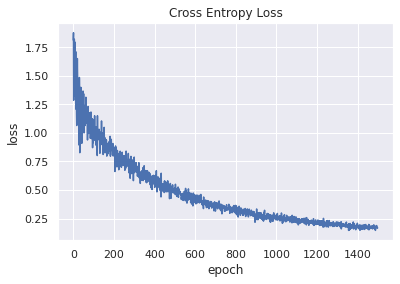

In [0]:
with tf.Session() as sess:
    sess.run(init)
    cost_array=np.zeros(1500)
    for epoch in range(1500):
        rand_index = np.random.choice(len(train_X), size=batch_size)   #creates a random index with batch_size no.of rows 
        batch_x = train_X[rand_index]
        batch_y = np.matrix(train_Y[rand_index]).T   #creates batch input and output
        sess.run(optimizer, feed_dict={data: batch_x, target:batch_y})
        c=sess.run(loss,feed_dict={data:batch_x,     #running optimizer,cost,accuracy
                                   target:batch_y})
        train_accuracy=sess.run(accuracy,feed_dict={data:batch_x,
                                   target:batch_y})
        
        cost_array[epoch]=c    #store and print cost
        if not epoch%100:
            print(f'epoch:{epoch} cost={c} accuracy={train_accuracy}')

    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_Y).T}) #check for test data's accuracy
    print(' test_acc: {:5f} '.format(temp_test_acc)) 
 
      
            

plt.plot(epoch_array,cost_array)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
